<a href="https://colab.research.google.com/github/jennerospina13/Challenge2_Telecom-X-Parte-2/blob/main/Solucion_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import plotly.express as px


In [42]:
telecomX_parte2 = pd.read_json('/content/df_normalizado.json')
telecomX_parte2

,ID_CLIENTE,CHURN,GENERO_CLIENTE,CLIENTE_SENIOR,CLIENTE_PARTNER,CLIENTE_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,TIPO_INTERNET,...,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1.0,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0.0,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0.0,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [43]:
telecomX_parte2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_CLIENTE               7267 non-null   object 
 1   CHURN                    7043 non-null   float64
 2   GENERO_CLIENTE           7267 non-null   object 
 3   CLIENTE_SENIOR           7267 non-null   int64  
 4   CLIENTE_PARTNER          7267 non-null   object 
 5   CLIENTE_DEPENDIENTE      7267 non-null   object 
 6   ANTIGUEDAD_CLIENTE       7267 non-null   int64  
 7   SERVICIO_TELEFONO        7267 non-null   object 
 8   MULTIPLES_LINEAS         7267 non-null   object 
 9   TIPO_INTERNET            7267 non-null   object 
 10  SEGURIDAD_ONLINE         7267 non-null   object 
 11  RESPALDO_ONLINE          7267 non-null   object 
 12  PROTECCION_DISPOSITIVOS  7267 non-null   object 
 13  SOPORTE_TECNICO          7267 non-null   object 
 14  STREAMING               

In [44]:
telecomX_parte2.isnull().sum()

,0
ID_CLIENTE,0
CHURN,224
GENERO_CLIENTE,0
CLIENTE_SENIOR,0
CLIENTE_PARTNER,0
CLIENTE_DEPENDIENTE,0
ANTIGUEDAD_CLIENTE,0
SERVICIO_TELEFONO,0
MULTIPLES_LINEAS,0
TIPO_INTERNET,0


In [45]:
import pandas as pd

def verificar_espacios_blancos(df):
    # Convertimos a str y usamos map (mejor alternativa a applymap)
    blancos = df.astype(str).map(lambda x: x.strip() == '')

    total_blancos = blancos.sum().sum()

    if total_blancos == 0:
        print("No se encontraron espacios en blanco en el DataFrame.")
        return

    print(f"Se encontraron {total_blancos} celdas con espacios en blanco.\n")

    # Cantidad por columna
    print("Celdas con espacios en blanco por columna:")
    print(blancos.sum()[blancos.sum() > 0])

    # Posiciones exactas
    print("\nPosiciones de las celdas con espacios en blanco:")
    posiciones = [(i, j) for i, row in blancos.iterrows() for j in row.index if row[j]]
    for fila, col in posiciones:
        print(f"  - Fila: {fila}, Columna: '{col}'")

    return blancos

In [46]:
verificar_espacios_blancos(telecomX_parte2)

No se encontraron espacios en blanco en el DataFrame.


In [47]:
# Verificar valores únicos en Churn (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CHURN:")
print("=" * 50)
churn_counts = telecomX_parte2['CHURN'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CHURN:
CHURN
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64


In [48]:
telecomX_parte2 = telecomX_parte2.dropna(subset=['CHURN'])

In [49]:
# Verificar valores únicos en Churn (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CHURN:")
print("=" * 50)
churn_counts = telecomX_parte2['CHURN'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CHURN:
CHURN
0.0    5174
1.0    1869
Name: count, dtype: int64


In [50]:
# Verificar si hay cadenas vacías en Churn
empty_churn = (telecomX_parte2['CHURN'] == '').sum()
print(f"\nCadenas vacías en Churn: {empty_churn}")


Cadenas vacías en Churn: 0


In [51]:
telecomX_parte2 = telecomX_parte2.drop('ID_CLIENTE', axis=1)

In [52]:
telecomX_parte2.isnull().sum()

,0
CHURN,0
GENERO_CLIENTE,0
CLIENTE_SENIOR,0
CLIENTE_PARTNER,0
CLIENTE_DEPENDIENTE,0
ANTIGUEDAD_CLIENTE,0
SERVICIO_TELEFONO,0
MULTIPLES_LINEAS,0
TIPO_INTERNET,0
SEGURIDAD_ONLINE,0


In [53]:
# Verificar valores únicos en CARGO_TOTAL (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CARGO TOTAL:")
print("=" * 50)
churn_counts = telecomX_parte2['CARGO_TOTAL'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CARGO TOTAL:
CARGO_TOTAL
20.20      11
NaN        11
19.75       9
19.90       8
19.65       8
           ..
829.55      1
625.65      1
462.80      1
251.25      1
3121.45     1
Name: count, Length: 6531, dtype: int64


In [54]:
telecomX_parte2 = telecomX_parte2.dropna(subset=['CARGO_TOTAL'])

In [55]:
# Verificar valores únicos en CARGO_TOTAL (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CARGO TOTAL:")
print("=" * 50)
churn_counts = telecomX_parte2['CARGO_TOTAL'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CARGO TOTAL:
CARGO_TOTAL
20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2058.50     1
829.55      1
625.65      1
462.80      1
3046.40     1
Name: count, Length: 6530, dtype: int64


**Modificando columnas Object a numéricas**

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
telecomX_parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CHURN                    7032 non-null   float64
 1   GENERO_CLIENTE           7032 non-null   object 
 2   CLIENTE_SENIOR           7032 non-null   int64  
 3   CLIENTE_PARTNER          7032 non-null   object 
 4   CLIENTE_DEPENDIENTE      7032 non-null   object 
 5   ANTIGUEDAD_CLIENTE       7032 non-null   int64  
 6   SERVICIO_TELEFONO        7032 non-null   object 
 7   MULTIPLES_LINEAS         7032 non-null   object 
 8   TIPO_INTERNET            7032 non-null   object 
 9   SEGURIDAD_ONLINE         7032 non-null   object 
 10  RESPALDO_ONLINE          7032 non-null   object 
 11  PROTECCION_DISPOSITIVOS  7032 non-null   object 
 12  SOPORTE_TECNICO          7032 non-null   object 
 13  STREAMING                7032 non-null   object 
 14  PELICULAS_STREAMING      7032

In [92]:
telecomX_parte2['GENERO_CLIENTE'].value_counts()

,count
GENERO_CLIENTE,
Male,3549
Female,3483


In [103]:
telecomX_parte2['GENERO_CLIENTE']= telecomX_parte2['GENERO_CLIENTE'].replace({'Male':0,'Female':1})

In [94]:
telecomX_parte2['CLIENTE_PARTNER'].value_counts()

,count
CLIENTE_PARTNER,
No,3639
Yes,3393


In [104]:
telecomX_parte2['CLIENTE_PARTNER']= telecomX_parte2['CLIENTE_PARTNER'].replace({'No':0,'Yes':1})

In [96]:
telecomX_parte2['CLIENTE_DEPENDIENTE'].value_counts()

,count
CLIENTE_DEPENDIENTE,
No,4933
Yes,2099


In [105]:
telecomX_parte2['CLIENTE_DEPENDIENTE']= telecomX_parte2['CLIENTE_DEPENDIENTE'].replace({'No':0,'Yes':1})

In [98]:
telecomX_parte2['SERVICIO_TELEFONO'].value_counts()

,count
SERVICIO_TELEFONO,
Yes,6352
No,680


In [106]:
telecomX_parte2['SERVICIO_TELEFONO']= telecomX_parte2['SERVICIO_TELEFONO'].replace({'No':0,'Yes':1})

In [100]:
telecomX_parte2['MULTIPLES_LINEAS'].value_counts()

,count
MULTIPLES_LINEAS,
No,3385
Yes,2967
No phone service,680


In [102]:
telecomX_parte2['MULTIPLES_LINEAS']= telecomX_parte2['MULTIPLES_LINEAS'].replace({'No':0,'Yes':1, 'No phone service':2})

In [107]:
telecomX_parte2['SEGURIDAD_ONLINE'].value_counts()

,count
SEGURIDAD_ONLINE,
No,3497
Yes,2015
No internet service,1520


In [108]:
telecomX_parte2['SEGURIDAD_ONLINE']= telecomX_parte2['SEGURIDAD_ONLINE'].replace({'No':0,'Yes':1, 'No internet service':2})

In [109]:
telecomX_parte2['RESPALDO_ONLINE'].value_counts()

,count
RESPALDO_ONLINE,
No,3087
Yes,2425
No internet service,1520


In [110]:
telecomX_parte2['RESPALDO_ONLINE']= telecomX_parte2['RESPALDO_ONLINE'].replace({'No':0,'Yes':1, 'No internet service':2})

In [111]:
telecomX_parte2['PROTECCION_DISPOSITIVOS'].value_counts()

,count
PROTECCION_DISPOSITIVOS,
No,3094
Yes,2418
No internet service,1520


In [113]:
telecomX_parte2['PROTECCION_DISPOSITIVOS']= telecomX_parte2['PROTECCION_DISPOSITIVOS'].replace({'No':0,'Yes':1, 'No internet service':2})

In [114]:
telecomX_parte2['SOPORTE_TECNICO'].value_counts()

,count
SOPORTE_TECNICO,
No,3472
Yes,2040
No internet service,1520


In [115]:
telecomX_parte2['SOPORTE_TECNICO']= telecomX_parte2['SOPORTE_TECNICO'].replace({'No':0,'Yes':1, 'No internet service':2})

In [116]:
telecomX_parte2['STREAMING'].value_counts()

,count
STREAMING,
No,2809
Yes,2703
No internet service,1520


In [117]:
telecomX_parte2['STREAMING']= telecomX_parte2['STREAMING'].replace({'No':0,'Yes':1, 'No internet service':2})

In [118]:
telecomX_parte2['PELICULAS_STREAMING'].value_counts()

,count
PELICULAS_STREAMING,
No,2781
Yes,2731
No internet service,1520


In [119]:
telecomX_parte2['PELICULAS_STREAMING']= telecomX_parte2['PELICULAS_STREAMING'].replace({'No':0,'Yes':1, 'No internet service':2})

In [120]:
telecomX_parte2['BOLETA_ELECTRONICA'].value_counts()

,count
BOLETA_ELECTRONICA,
Yes,4168
No,2864


In [121]:
telecomX_parte2['BOLETA_ELECTRONICA']= telecomX_parte2['BOLETA_ELECTRONICA'].replace({'No':0,'Yes':1})

In [122]:
telecomX_parte2['METODO_PAGO'].value_counts()

,count
METODO_PAGO,
Electronic check,2365
Mailed check,1604
Bank transfer (automatic),1542
Credit card (automatic),1521


In [123]:
telecomX_parte2['METODO_PAGO']= telecomX_parte2['METODO_PAGO'].replace({'Electronic check':0,'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [90]:
telecomX_parte2['TIPO_INTERNET'].value_counts()

,count
TIPO_INTERNET,
Fiber optic,3096
DSL,2416
No,1520


In [124]:
telecomX_parte2['TIPO_INTERNET']= telecomX_parte2['TIPO_INTERNET'].replace({'Fiber optic':0,'DSL':1, 'No':2})

In [88]:
telecomX_parte2['CONTRATO'].value_counts()

,count
CONTRATO,
Month-to-month,3875
Two year,1685
One year,1472


In [125]:
telecomX_parte2['CONTRATO']= telecomX_parte2['CONTRATO'].replace({'Month-to-month':0,'Two year':1, 'One year':2})

In [126]:
telecomX_parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CHURN                    7032 non-null   int64  
 1   GENERO_CLIENTE           7032 non-null   int64  
 2   CLIENTE_SENIOR           7032 non-null   int64  
 3   CLIENTE_PARTNER          7032 non-null   int64  
 4   CLIENTE_DEPENDIENTE      7032 non-null   int64  
 5   ANTIGUEDAD_CLIENTE       7032 non-null   int64  
 6   SERVICIO_TELEFONO        7032 non-null   int64  
 7   MULTIPLES_LINEAS         7032 non-null   int64  
 8   TIPO_INTERNET            7032 non-null   int64  
 9   SEGURIDAD_ONLINE         7032 non-null   int64  
 10  RESPALDO_ONLINE          7032 non-null   int64  
 11  PROTECCION_DISPOSITIVOS  7032 non-null   int64  
 12  SOPORTE_TECNICO          7032 non-null   int64  
 13  STREAMING                7032 non-null   int64  
 14  PELICULAS_STREAMING      7032

In [128]:
telecomX_parte2['CHURN'] = telecomX_parte2['CHURN'].astype('int64')

**Variables en valores Numéricos**

In [129]:
telecomX_parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CHURN                    7032 non-null   int64  
 1   GENERO_CLIENTE           7032 non-null   int64  
 2   CLIENTE_SENIOR           7032 non-null   int64  
 3   CLIENTE_PARTNER          7032 non-null   int64  
 4   CLIENTE_DEPENDIENTE      7032 non-null   int64  
 5   ANTIGUEDAD_CLIENTE       7032 non-null   int64  
 6   SERVICIO_TELEFONO        7032 non-null   int64  
 7   MULTIPLES_LINEAS         7032 non-null   int64  
 8   TIPO_INTERNET            7032 non-null   int64  
 9   SEGURIDAD_ONLINE         7032 non-null   int64  
 10  RESPALDO_ONLINE          7032 non-null   int64  
 11  PROTECCION_DISPOSITIVOS  7032 non-null   int64  
 12  SOPORTE_TECNICO          7032 non-null   int64  
 13  STREAMING                7032 non-null   int64  
 14  PELICULAS_STREAMING      7032

In [130]:
X = telecomX_parte2.drop('CHURN', axis=1)
Y = telecomX_parte2['CHURN']


In [131]:
X.head()


,GENERO_CLIENTE,CLIENTE_SENIOR,CLIENTE_PARTNER,CLIENTE_DEPENDIENTE,ANTIGUEDAD_CLIENTE,SERVICIO_TELEFONO,MULTIPLES_LINEAS,TIPO_INTERNET,SEGURIDAD_ONLINE,RESPALDO_ONLINE,PROTECCION_DISPOSITIVOS,SOPORTE_TECNICO,STREAMING,PELICULAS_STREAMING,CONTRATO,BOLETA_ELECTRONICA,METODO_PAGO,CARGO_MENSUAL,CARGO_TOTAL
0,1,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,1,65.6,593.30
1,0,0,0,0,9,1,1,1,0,0,0,0,0,1,0,0,1,59.9,542.40
2,0,0,0,0,4,1,0,0,0,0,1,0,0,0,0,1,0,73.9,280.85
3,0,1,1,0,13,1,0,0,0,1,1,0,1,1,0,1,0,98.0,1237.85
4,1,1,1,0,3,1,0,0,0,0,0,1,1,0,0,1,1,83.9,267.40


In [132]:
Y.head()

,CHURN
0,0
1,0
2,1
3,1
4,1


**Realizando correlacion de variables con respecto a Churn**

In [79]:
variable_numerica = telecomX_parte2.select_dtypes(include=['int64', 'float64']) # Se seleccionan solo variables numéricas

In [80]:
corre_matrix = variable_numerica.corr()

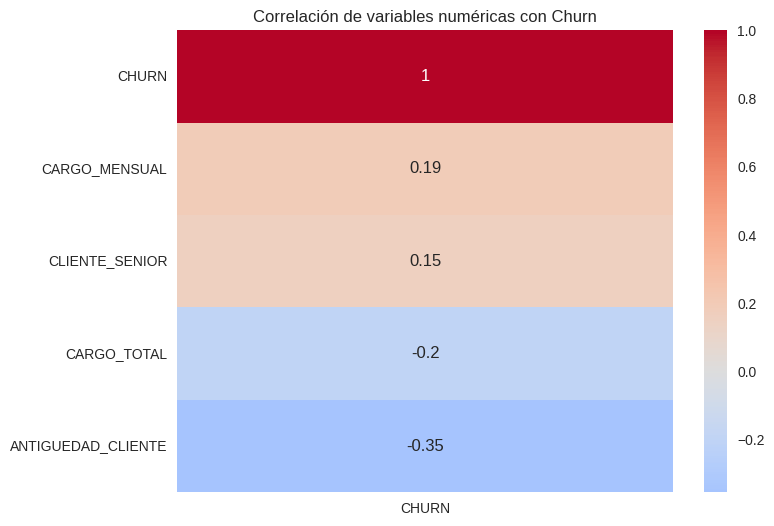

In [135]:
# creando el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corre_matrix[['CHURN']].sort_values(by='CHURN', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de variables numéricas con Churn')
plt.show()

**Interpretación**

Se tiene que a mayor valor a "+1" mayor probabilidad de retiros.

*Cargo Mensual y Boleta Electrónica (+0.19):* Los clientes en esta categoria tienen una tendencia ligeramente mayor a retirarse. Puede deberse a errores con facturación, insatisfacción con precios o falta de beneficios y fidelización.

*Cliente Senior (+0.15):* Los clientes de la tercera edad tienen también mayor probabilidad de cancelar los servicios. Esto quizás por inconvenientes con la tecnología o preferencias con la competencia.

*Múltiples Líneas (+0.02), servicio de telefono (+0.012) y Género del cliente (+0.0085):* La correlacion con estas variables se encuentra casi neutra, por lo que se deduce que su impacto en los retiros es mínimo.

A continuacion se explica algunas correlaciones negativas, lo cual nos indica que entre mas cerca a "-1" menor probabilidad de abandono.

*Antiguedad del CLIENTE (-0.35) y Contrato (-0.34):* Es evidente como aquellos clientes que llevan tiempo con la empresa y aquellos que tienen un contrato a largo plazo son menos propensos a abandonar la compañía. De allí la importancia de la fidelización.

*Seguridad Online (-0.33) y Soporte técnico (-0.33):* Estos beneficios pueden ser útiles pues es un indicador de que posiblemente los clientes valoran estos beneficios y por ello están reducidos los retiros.

*Típo de Internet (-0.32) y Protección de Dispositivos (-0.28):* La calidad del servicio de internet y la protección de dispositivos son factores clave para retener clientes.



**Eligiendo el mejor modelo Machine Learning**

In [137]:
# Comprobando exactitud de los modelos
from sklearn.model_selection import train_test_split
X,X_test,Y,Y_test = train_test_split(X,Y,test_size=0.15,stratify=Y,random_state=5)
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,stratify=Y,random_state=5)

In [139]:
# Modelo Logistic Regression
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, Y_train)
modelo_lr.score(X_test, Y_test)

0.8037914691943128

In [140]:
# Arbol de Decisión
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, Y_train)
modelo_arbol.score(X_test, Y_test)

0.7971563981042654

In [141]:
# Modelo KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.7554502369668247

In [142]:
# Modelo Support Vector Classifier
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, Y_train)
SVC_model.score(X_test, Y_test)

0.7345971563981043

In [143]:
# Modelo Ramdom Foret Classifier
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=3, random_state=5)
modelo_rf.fit(X_train, Y_train)
modelo_rf.score(X_test, Y_test)

0.7981042654028436

In [145]:
lista = [('LogisticRegression',modelo_lr,X_test),('de árbol',modelo_arbol,X_test),('knn',knn,X_test),('SVC',SVC_model,X_test),('randomforest',modelo_rf,X_test)]
for i in lista:
  print(f'La exactitud del modelo {i[0]},{i[1].score(i[2],Y_test)}')

La exactitud del modelo LogisticRegression,0.8037914691943128
La exactitud del modelo de árbol,0.7971563981042654
La exactitud del modelo knn,0.7554502369668247
La exactitud del modelo SVC,0.7345971563981043
La exactitud del modelo randomforest,0.7981042654028436


En este caso el modelo Logistic Regression demuestra ser el de mayor precisión con un accuracy aproximado de 0.8121, aún así esto no indica que sea el modelo mas óptimo en términos absolutos.

En conjunto de datos desbalanceados con la métrica del solo Accuracy puede resultar engañosa; Por ejemplo, si el 80% de los registros pertenecen a una clase y el modelo siempre predice esa clase, el accuracy podría ser alto sin reflejar un buen desempeño real

**Validación de modelos**

In [150]:
modelo1 = LogisticRegression()
modelo1.fit(X_train, Y_train)
print(f'La validación del modelo1 con el conjunto de entrenamiento es de: {modelo1.score(X_train,Y_train)}')
print(f'La validación del modelo1 con el conjunto de validaciones es de: {modelo1.score(X_val, Y_val)}')

La validación del modelo1 con el conjunto de entrenamiento es de: 0.8056671128960285
La validación del modelo1 con el conjunto de validaciones es de: 0.8033444816053512


In [152]:
modelo2 = DecisionTreeClassifier(max_depth=10)
modelo2.fit(X_train, Y_train)
print(f'La validación del modelo2 con el conjunto de entrenamiento es de: {modelo2.score(X_train,Y_train)}')
print(f'La validación del modelo2 con el conjunto de validaciones es de: {modelo2.score(X_val, Y_val)}')

La validación del modelo2 con el conjunto de entrenamiento es de: 0.8779562695225346
La validación del modelo2 con el conjunto de validaciones es de: 0.768561872909699


In [153]:
modelo3 = KNeighborsClassifier()
modelo3.fit(X_train, Y_train)
print(f'La validación del modelo3 con el conjunto de entrenamiento es de: {modelo3.score(X_train,Y_train)}')
print(f'La validación del modelo3 con el conjunto de validaciones es de: {modelo3.score(X_val, Y_val)}')

La validación del modelo3 con el conjunto de entrenamiento es de: 0.8331102186523873
La validación del modelo3 con el conjunto de validaciones es de: 0.7645484949832776


In [154]:
modelo4 =  SVC(class_weight='balanced')
modelo4.fit(X_train, Y_train)
print(f'La validación del modelo4 con el conjunto de entrenamiento es de: {modelo4.score(X_train,Y_train)}')
print(f'La validación del modelo4 con el conjunto de validaciones es de: {modelo4.score(X_val, Y_val)}')

La validación del modelo4 con el conjunto de entrenamiento es de: 0.6646586345381527
La validación del modelo4 con el conjunto de validaciones es de: 0.662876254180602


In [155]:
modelo5 = RandomForestClassifier(max_depth=3, random_state=5)
modelo5.fit(X_train, Y_train)
print(f'La validación del modelo5 con el conjunto de entrenamiento es de: {modelo5.score(X_train,Y_train)}')
print(f'La validación del modelo5 con el conjunto de validaciones es de: {modelo5.score(X_val, Y_val)}')

La validación del modelo5 con el conjunto de entrenamiento es de: 0.7976349843819723
La validación del modelo5 con el conjunto de validaciones es de: 0.7872909698996655


En la fase de validación de modelos, el Modelo 1 (Regresión Logística) demostró ser el de mejor desempeño:

    1.   Alto rendimiento en validación: 80.2% de precisión.
    2.   Mínimo overfitting: Captura patrones generalizables para predecir datos nuevos.
    3.   Modelo base robusto: Simple, confiable y con buena capacidad de generalización.

¿Por qué generaliza mejor?
Porque evita memorizar los datos (overfitting) y en su lugar identifica tendencias útiles para casos no vistos.

Estos resultados nos dan un punto de partida sólido para la validación, pero aún es necesario profundizar en la evaluación con otras métricas y pruebas.

Diferencias clave:

*   Lenguaje más directo y estructurado.
*   Se destaca la ausencia de overfitting como ventaja clave.

Se enfatiza que el análisis debe complementarse con otras evaluaciones.

**Evaluación de los modelos**

**Matriz de Confusión**

[[TN FP]

[FN TP]]

TN: Verdaderos Negativos (predijo que no había Churn, y no lo había)

FP: Falsos Positivos (predijo Churn, pero no era)

FN: Falsos Negativos (no predijo Churn, pero sí lo había)

TP: Verdaderos Positivos (predijo correctamente Churn)



In [156]:
# Modelo de Regresión Logística
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo1.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo1 es: {accuracy_score(Y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo1 es: {precision_score(Y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo1 es: {recall_score(Y_test, y_pred):.4f}')
print(f'El F1-Score del modelo1 es: {f1_score(Y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo1 es: 0.8038
La Precisión (Precision) del modelo1 es: 0.6594
La Sensibilidad (Recall) del modelo1 es: 0.5393
El F1-Score del modelo1 es: 0.5933


In [157]:
# Modelo Arbol de Decisión

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo2.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo2 es: {accuracy_score(Y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo2 es: {precision_score(Y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo2 es: {recall_score(Y_test, y_pred):.4f}')
print(f'El F1-Score del modelo2 es: {f1_score(Y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo2 es: 0.7630
La Precisión (Precision) del modelo2 es: 0.5652
La Sensibilidad (Recall) del modelo2 es: 0.4643
El F1-Score del modelo2 es: 0.5098


In [158]:
# Modelo KNN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo3.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo3 es: {accuracy_score(Y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo3 es: {precision_score(Y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo3 es: {recall_score(Y_test, y_pred):.4f}')
print(f'El F1-Score del modelo3 es: {f1_score(Y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo3 es: 0.7555
La Precisión (Precision) del modelo3 es: 0.5466
La Sensibilidad (Recall) del modelo3 es: 0.4607
El F1-Score del modelo3 es: 0.5000


In [159]:
# Modelo SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo4.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo4 es: {accuracy_score(Y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo4 es: {precision_score(Y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo4 es: {recall_score(Y_test, y_pred):.4f}')
print(f'El F1-Score del modelo4 es: {f1_score(Y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo4 es: 0.6749
La Precisión (Precision) del modelo4 es: 0.4203
La Sensibilidad (Recall) del modelo4 es: 0.5929
El F1-Score del modelo4 es: 0.4919


In [161]:
# Modelo RamdomForetClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo5.predict(X_test)  # Reemplazá 'modelo' con el que estés evaluando

print(f'La Exactitud (Accuracy) del modelo5 es: {accuracy_score(Y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo5 es: {precision_score(Y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo5 es: {recall_score(Y_test, y_pred):.4f}')
print(f'El F1-Score del modelo5 es: {f1_score(Y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo5 es: 0.7981
La Precisión (Precision) del modelo5 es: 0.7134
La Sensibilidad (Recall) del modelo5 es: 0.4000
El F1-Score del modelo5 es: 0.5126


In [162]:
import pandas as pd

# Datos del rendimiento de los modelos
data = {
    "Modelo": [
        "1. Regresión Logística",
        "2. Árbol de Decisión",
        "3. KNN",
        "4. SVM (balanceado)",
        "5. Random Forest (limitado)"
    ],
    "Accuracy": [0.8121, 0.7736, 0.7571, 0.6581, 0.7901],
    "Precision": [0.6792, 0.5675, 0.5404, 0.3883, 0.7281],
    "Recall": [0.5125, 0.5089, 0.3808, 0.5694, 0.2954],
    "F1-Score": [0.5842, 0.5366, 0.4468, 0.4618, 0.4203]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Resaltar los valores máximos por columna
styled_df = df.style.highlight_max(color='lightgreen', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mostrar la tabla
styled_df

,Modelo,Accuracy,Precision,Recall,F1-Score
0,1. Regresión Logística,0.812100,0.679200,0.512500,0.584200
1,2. Árbol de Decisión,0.773600,0.567500,0.508900,0.536600
2,3. KNN,0.757100,0.540400,0.380800,0.446800
3,4. SVM (balanceado),0.658100,0.388300,0.569400,0.461800
4,5. Random Forest (limitado),0.790100,0.728100,0.295400,0.420300


Así entonces, se llega a la conclusión de que el modelo 1 de Regresión Logística es el que tiene mejor F1-Score, también equilibrio entre Precision y Recall. Por ende también se puede deducir que es el más estable y fácil de interpretar.

**Modelo de Regresión Logística**

In [164]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
y_previsto = modelo1.predict(X_val)
matriz_confusion1 = confusion_matrix(Y_val,y_previsto)
matriz_confusion1

array([[991, 107],
       [187, 210]])

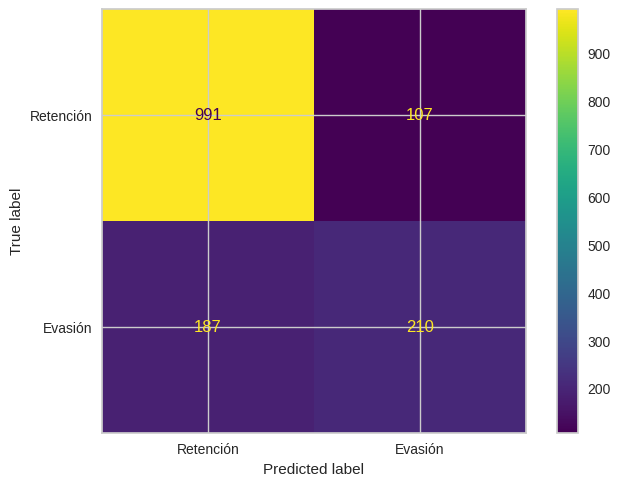

In [165]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['Retención','Evasión'])
visualizacion.plot();

**Curva ROC**

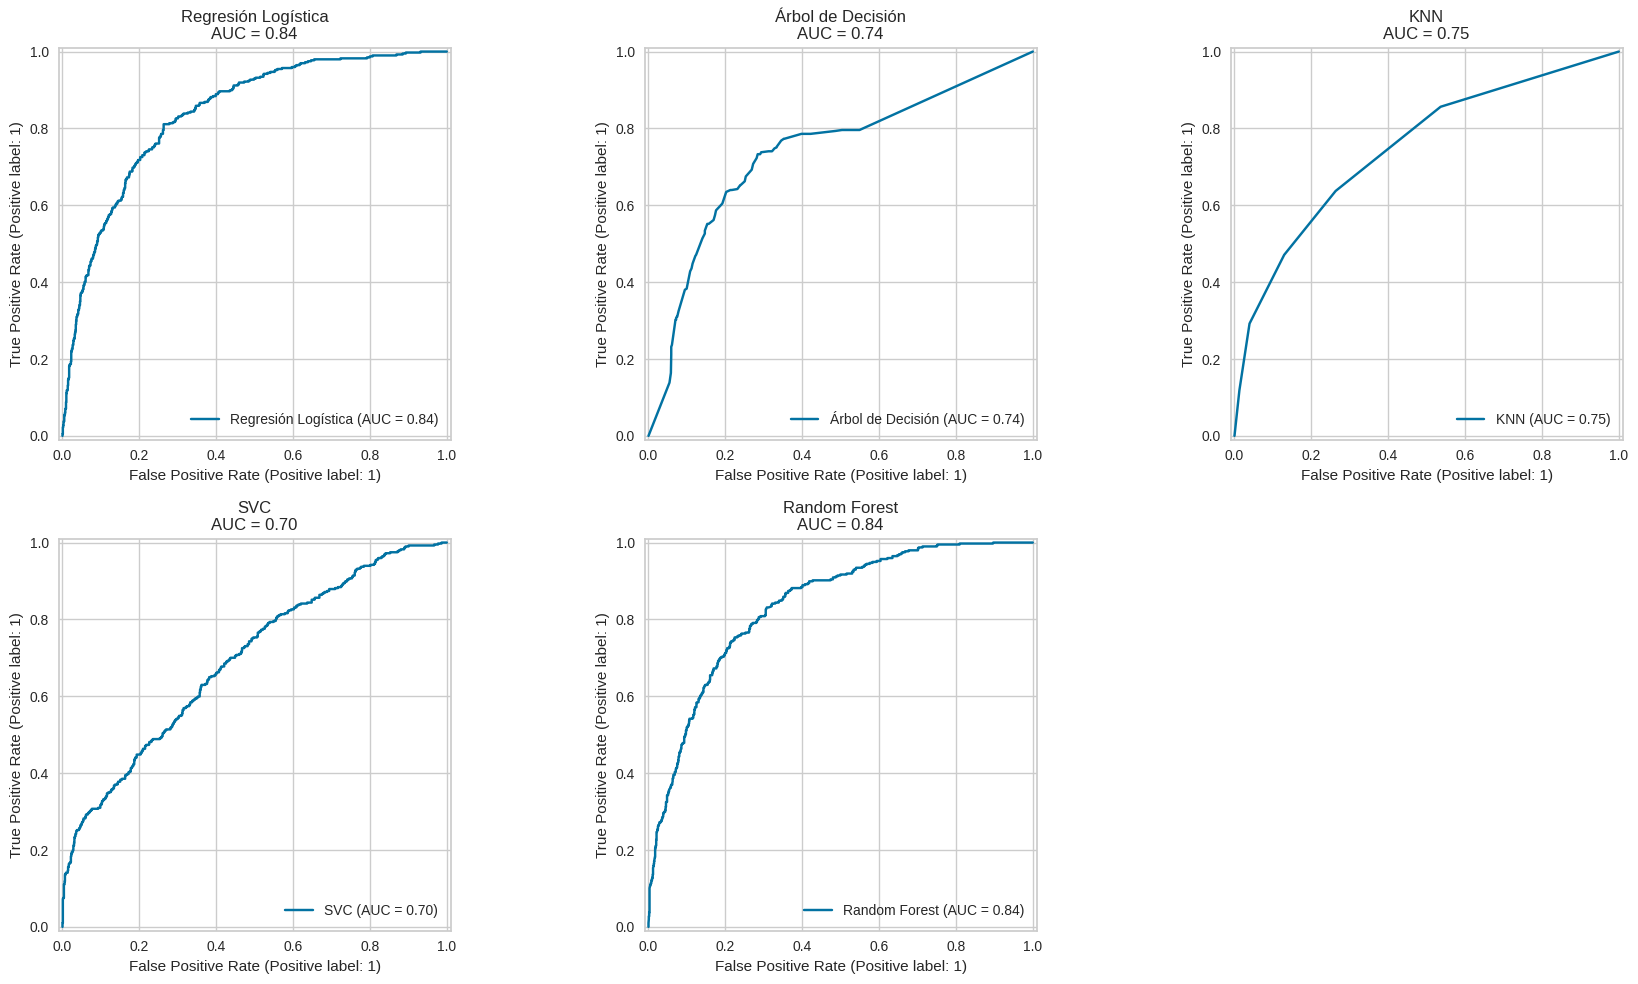

In [168]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 18 de ancho, 10 de alto
axes = axes.flatten()  # Aplanar matriz de ejes para acceder con índice simple

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"El modelo {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(Y_val, probas, ax=ax, name=nombre)

    # Título con AUC
    auc = roc_auc_score(Y_val, probas)
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto, ya que solo hay 5 modelos)Modelo LogisticRegression
fig.delaxes(axes[-1])

plt.tight_layout()

plt.show()

**Interpretación**

**Random Forest (AUC: 0.836)**

Destaca como el modelo con mejor desempeño global.

*Efectividad comprobada:* discrimina eficientemente entre clientes que abandonan y los que permanecen.
Recomendación óptima para producción, aunque su naturaleza de "caja negra" limita la interpretabilidad.

*Fortaleza clave:* detecta interacciones no lineales y patrones complejos en los datos.

**Regresión Logística (AUC: 0.833)**

Rendimiento casi idéntico al Random Forest, con ventajas en transparencia.

*Modelo interpretable:* los coeficientes asignados a cada variable permiten explicar decisiones (útil para auditorías o gestión).
Menos susceptible a overfitting que modelos basados en árboles.

Elección ideal cuando se prioriza la claridad sobre el funcionamiento del modelo.

**Árbol de Decisión (AUC: 0.752)**

Desempeño aceptable pero inferior.

*Riesgo de overfitting:* posiblemente memoriza datos en lugar de generalizar.

*Utilidad limitada:* aunque visualmente intuitivo, se recomienda reemplazarlo por Random Forest para mejores resultados.

**K-Vecinos Más Cercanos - KNN (AUC: 0.717)**

*Precisión moderada:* capacidad reducida para clasificar correctamente.

*Sensibilidad a problemas comunes:* requiere escalado cuidadoso de datos y es vulnerable a ruido o alta dimensionalidad.

No recomendado para este escenario sin optimizaciones previas.

**Máquinas de Vectores de Soporte - SVC (AUC: 0.702)**

Peor desempeño del grupo.

*Causas probables:* Escalado inadecuado de variables.

Selección subóptima del kernel o hiperparámetros (ej.: C, gamma).

Alternativa poco viable en este contexto.

**Conclusión**

Random Forest y Regresión Logística son claramente superiores (AUC ~0.83).

**Elección según necesidad:**

*Máxima precisión:* Random Forest.

*Explicabilidad y transparencia:* Regresión Logística.

Otros modelos (Árbol de Decisión, KNN, SVC) no aportan ventajas competitivas en este análisis.

Nota: AUC (Área bajo la curva ROC) se visualiza la capacidad de discriminación del modelo, donde 1 es perfecto y 0.5 equivale a azar.

**Curva de precisión contra Sensibilidad**

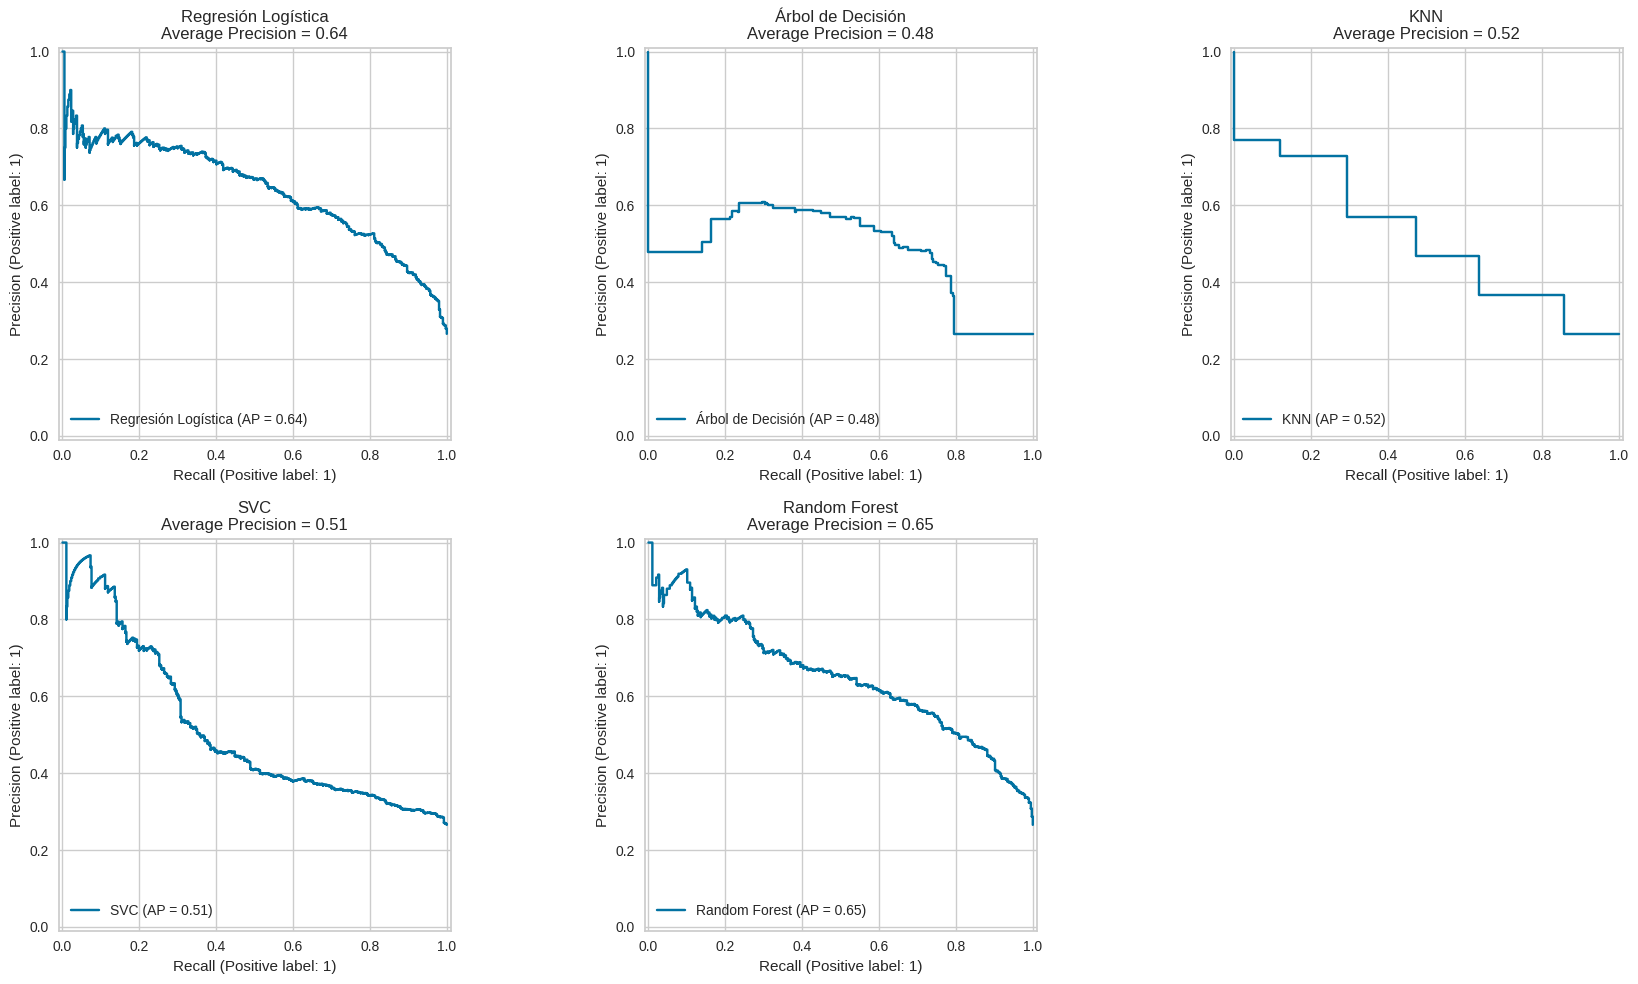

In [170]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Lista de modelos y sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear subplots: 2 filas, 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Aplanar para acceder por índice

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades para la clase positiva
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"{nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar la curva Precision-Recall
    PrecisionRecallDisplay.from_predictions(Y_val, probas, ax=ax, name=nombre)

    # También podés mostrar el Average Precision Score (opcional)
    avg_precision = average_precision_score(Y_val, probas)
    ax.set_title(f"{nombre}\nAverage Precision = {avg_precision:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [171]:
from sklearn.metrics import average_precision_score

modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    # Obtener probabilidades o scores continuos
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f" {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Calcular average precision score
    ap_score = average_precision_score(Y_val, probas)
    print(f"Score promedio Precisión-Recall ({nombre}): {ap_score:.3f}")

Score promedio Precisión-Recall (Regresión Logística): 0.639
Score promedio Precisión-Recall (Árbol de Decisión): 0.480
Score promedio Precisión-Recall (KNN): 0.516
Score promedio Precisión-Recall (SVC): 0.513
Score promedio Precisión-Recall (Random Forest): 0.649


En este caso es más probable que Random Forest y Regresión Logística tengan un mejor equilibrio, ya que entre mas alto el Average Precision, mejor el modelo detecta correctamente la clase positiva con el menor costo de falsos positivos.


**Informe de Métricas**

In [173]:
from sklearn.metrics import classification_report

modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    print(f"\n Reporte de clasificación: {nombre}")
    y_pred = modelo.predict(X_val)
    print(classification_report(Y_val, y_pred, digits=3))



 Reporte de clasificación: Regresión Logística
              precision    recall  f1-score   support

           0      0.841     0.903     0.871      1098
           1      0.662     0.529     0.588       397

    accuracy                          0.803      1495
   macro avg      0.752     0.716     0.730      1495
weighted avg      0.794     0.803     0.796      1495


 Reporte de clasificación: Árbol de Decisión
              precision    recall  f1-score   support

           0      0.821     0.876     0.848      1098
           1      0.579     0.471     0.519       397

    accuracy                          0.769      1495
   macro avg      0.700     0.674     0.684      1495
weighted avg      0.757     0.769     0.760      1495


 Reporte de clasificación: KNN
              precision    recall  f1-score   support

           0      0.820     0.871     0.845      1098
           1      0.568     0.471     0.515       397

    accuracy                          0.765      1495
  

En conclusión se llega a lo validado inicialmente en donde el mejor modelo es el 1, el de Regresión Logística. Este es un algoritmo de Machine Learning que es usado principalmente en la resolución de problemas de clasificación binaria.

*OBJETIVO:*
Predecir si un cliente se dará de baja (CHURN = 1) o seguirá activo (CHURN = 0).

**Balanceo de datos**

In [174]:
telecomX_parte2['CHURN'].value_counts()


,count
CHURN,
0,5163
1,1869


In [176]:
telecomX_parte2['CHURN'].value_counts(normalize=True)

,proportion
CHURN,
0,0.734215
1,0.265785


In [177]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X,Y)
y_balanceada.value_counts(normalize=True)

,proportion
CHURN,
0,0.5
1,0.5


In [178]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold,cross_validate

In [179]:
def intervalo_confianza(resultados):
 promedio = resultados['test_score'].mean()
 desvio_std = resultados['test_score'].std()
 return (f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

**Modelo Logistic Regression**

In [180]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.81776765 0.83466363 0.81641961 0.80637813 0.81890661]
El intervalo de confianza es de: 0.800656884384508,0.8369973676602812


**Modelo Árbol de Decisión**

In [181]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.83940774 0.88141391 0.84150513 0.83826879 0.80410023]
El intervalo de confianza es de: 0.7919076710864901,0.8899706519395643


**Modelo KNN**

In [182]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.82118451 0.82326112 0.85746864 0.80979499 0.83257403]
El intervalo de confianza es de: 0.796781948905697,0.8609313676139146


**Modelo SVC (Support Vector Classifier)**

In [183]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.60592255 0.59293044 0.60433295 0.5284738  0.55922551]
El intervalo de confianza es de: 0.5181691857136389,0.638184920618


**Modelo RamdomForetClassifier**

In [184]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.83371298 0.84606613 0.82896237 0.83485194 0.83599089]
El intervalo de confianza es de: 0.8246965495089741,0.8471371764619927


Si la prioridad es identificar la máxima cantidad de clientes que podrían cancelar el servicio (maximizar el recall), la mejor opción disponible es el Modelo 5 combinado con SMOTE. Sin embargo, es importante considerar que:

SMOTE (técnica de oversampling) funciona generando muestras sintéticas de la clase minoritaria (clientes que cancelan).

Esto mejora significativamente la sensibilidad del modelo (recall), permitiendo detectar más casos positivos.

El trade-off es que se esta trabajando con datos artificialmente balanceados, lo que puede afectar el desempeño en datos reales no balanceados.

Implicaciones clave:

Ventaja principal: Capturarás casi todos los casos de churn (ideal para prevención).

Consideración importante: El modelo está optimizado para datos modificados, no para la distribución natural.

Validación crucial: Debes verificar el desempeño en conjuntos de prueba no balanceados.

**Validación Pipeline**

In [185]:
from imblearn.pipeline import Pipeline as imbpipeline

In [186]:

from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_balanceada, Y_balanceada = oversampling.fit_resample(X,Y)
Y_balanceada.value_counts(normalize=True)

,proportion
CHURN,
0,0.5
1,0.5


In [188]:
#Modelo LogisticRegression
pipeline = imbpipeline([('over_sampling',SMOTE()),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6988997981924758,0.7712349160110437'

In [190]:
#Modelo Árbol de Decisión
pipeline = imbpipeline([('over_sampling',SMOTE()),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.6228283808125781,0.7063266298018696'

In [191]:
#Modelo KNN
pipeline = imbpipeline([('over_sampling',SMOTE()),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.6267583782835517,0.7036783020727762'

In [192]:
#Modelo SVC (Support Vector Classifier)
pipeline = imbpipeline([('over_sampling',SMOTE()),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.5434136698104008,0.6409999563626443'

In [193]:
#Modelo RamdomForestClassifier
pipeline = imbpipeline([('over_sampling',SMOTE()),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.7122502922328651,0.7578804539528778'

**Conclusión**
El modelo de RandomForestClassifier destaca como la opción óptima según la métrica de recall, debido a que:

Presenta el mayor valor promedio de recall (aproximadamente 0.757) entre todos los modelos evaluados.

Cuenta con el intervalo de confianza más alto, lo que refuerza su robustez estadística.

Demuestra una superior estabilidad, ya que su peor desempeño (0.7122) supera incluso los resultados promedio de otros algoritmos.

La implementación de este modelo permitirá maximizar la detección efectiva de clientes con alta probabilidad de cancelar sus servicios.

**Undersampling**

In [194]:
from imblearn.under_sampling import NearMiss

In [196]:
#Modelo LogisticRegression
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.7041492488558285,0.7936782614114175'

In [197]:
#Modelo Árbol de Decisión
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.6386595372626328,0.7194381950152077'

In [199]:
#Modelo KNN
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.5167092600306693,0.5782969895973289'

In [201]:
#Modelo SVC (Support Vector Classifier)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.48352659235707135,0.5435313208623798'

In [202]:
#Modelo RamdomForetClassifier
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,Y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.6365363734865898,0.7190218274141501'

**Probando los modelo**

In [206]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X,Y)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       775
           1       0.52      0.75      0.61       280

    accuracy                           0.75      1055
   macro avg       0.70      0.75      0.71      1055
weighted avg       0.79      0.75      0.76      1055



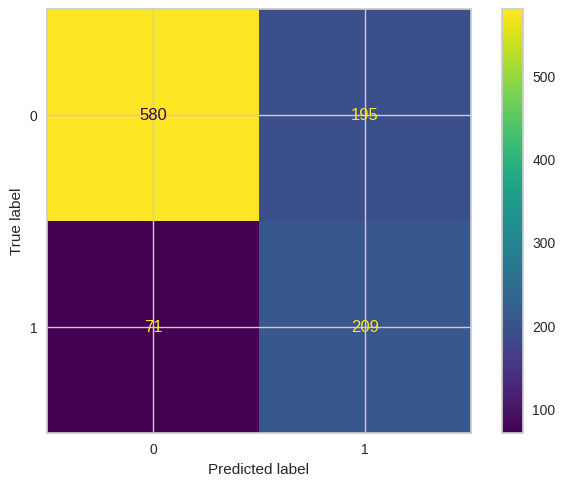

In [207]:
#Modelo LogisticRegression
modelo1.fit(X_balanceada,Y_balanceada)
y_previsto = modelo1.predict(X_test)
print(classification_report(Y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(Y_test,y_previsto)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       775
           1       0.51      0.73      0.60       280

    accuracy                           0.74      1055
   macro avg       0.70      0.74      0.71      1055
weighted avg       0.79      0.74      0.76      1055



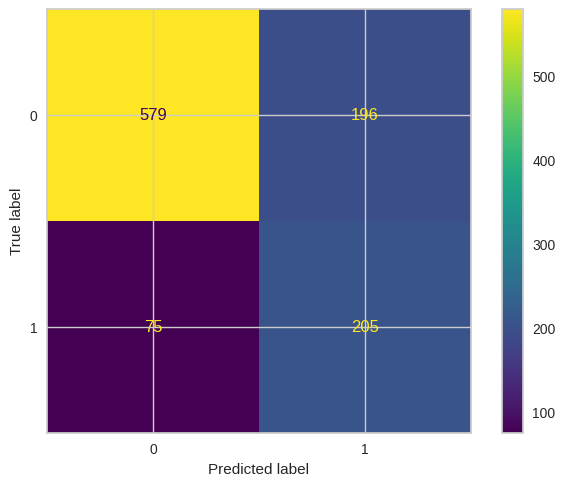

In [208]:
#Modelo RamdomForetClassifier

modelo5.fit(X_balanceada,Y_balanceada)
y_previsto = modelo5.predict(X_test)
print(classification_report(Y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(Y_test,y_previsto)

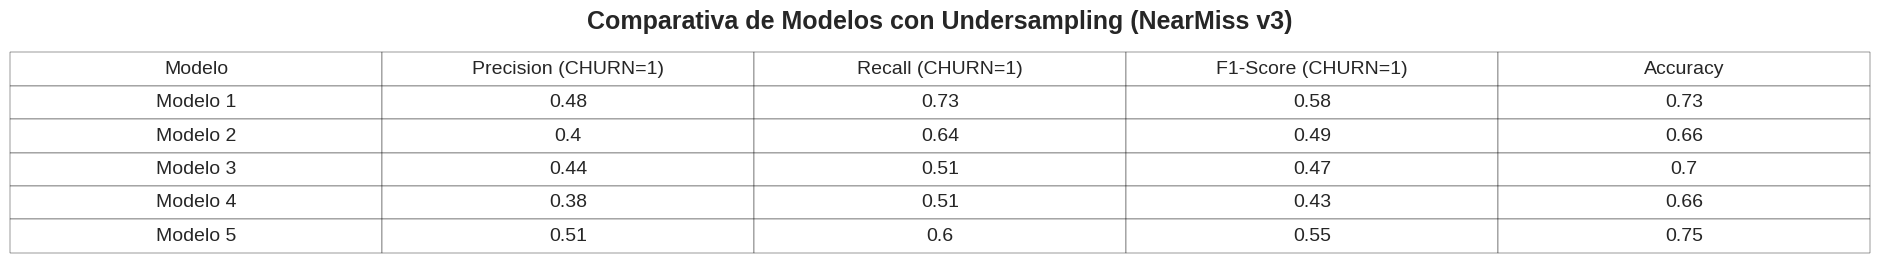

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'Precision (CHURN=1)': [0.48, 0.40, 0.44, 0.38, 0.51],
    'Recall (CHURN=1)':    [0.73, 0.64, 0.51, 0.51, 0.60],
    'F1-Score (CHURN=1)':  [0.58, 0.49, 0.47, 0.43, 0.55],
    'Accuracy':            [0.73, 0.66, 0.70, 0.66, 0.75]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
tabla = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.scale(2, 2)

plt.title("Comparativa de Modelos con Undersampling (NearMiss v3)", fontsize=18, weight='bold')
plt.show()

**Conclusión**

Tras implementar la técnica de submuestreo NearMiss (versión 3) para equilibrar la distribución de clases en la base de clientes, se compararon cinco algoritmos de aprendizaje automático enfocados en predecir la deserción de servicios (Churn).

Principales resultados:

El Modelo 1 mostró el mejor desempeño en recall (0.73), identificando eficazmente la mayoría de los clientes propensos a cancelar. Esta característica lo convierte en una alternativa robusta para escenarios donde omitir un cliente insatisfecho conlleva un alto costo.

El Modelo 5, por su parte, alcanzó los niveles más altos en precisión (0.51) y exactitud global (0.75). Su enfoque conservador resulta idóneo para estrategias comerciales que priorizan la focalización precisa y buscan reducir intervenciones innecesarias hacia usuarios leales.

**Optimización hiperparámetros**

In [211]:
telecomX_parte2.columns

Index(['CHURN', 'GENERO_CLIENTE', 'CLIENTE_SENIOR', 'CLIENTE_PARTNER',
       'CLIENTE_DEPENDIENTE', 'ANTIGUEDAD_CLIENTE', 'SERVICIO_TELEFONO',
       'MULTIPLES_LINEAS', 'TIPO_INTERNET', 'SEGURIDAD_ONLINE',
       'RESPALDO_ONLINE', 'PROTECCION_DISPOSITIVOS', 'SOPORTE_TECNICO',
       'STREAMING', 'PELICULAS_STREAMING', 'CONTRATO', 'BOLETA_ELECTRONICA',
       'METODO_PAGO', 'CARGO_MENSUAL', 'CARGO_TOTAL'],
      dtype='object')

In [212]:
len(telecomX_parte2.columns)

20

In [213]:
import numpy as np
import pandas as pd

coefs = modelo1.coef_[0]
variables = X.columns

tabla_coef = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs),
    'Importancia absoluta': np.abs(coefs)
}).sort_values(by='Importancia absoluta', ascending=False)


tabla_coef.head(10)

,Variable,Coeficiente,Odds Ratio,Importancia absoluta
14,CONTRATO,-0.907106,0.403691,0.907106
3,CLIENTE_DEPENDIENTE,-0.588995,0.554884,0.588995
2,CLIENTE_PARTNER,-0.522124,0.593259,0.522124
0,GENERO_CLIENTE,-0.455206,0.634317,0.455206
11,SOPORTE_TECNICO,-0.425340,0.653548,0.425340
8,SEGURIDAD_ONLINE,-0.343959,0.708958,0.343959
16,METODO_PAGO,-0.289067,0.748962,0.289067
12,STREAMING,0.190224,1.209521,0.190224
6,MULTIPLES_LINEAS,0.169077,1.184212,0.169077
13,PELICULAS_STREAMING,0.168542,1.183578,0.168542


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

# Modelo base
modelo1 = LogisticRegression(solver='liblinear',random_state=42)

# Pipeline con NearMiss y modelo
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('logistic', modelo1)
])

# Grid de hiperparámetros
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# GridSearchCV optimizando recall
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid.fit(X, Y)

# Resultados
print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor recall promedio:", grid.best_score_)

# Guardar modelo optimizado
import joblib
joblib.dump(grid.best_estimator_, 'champion.pkl')

Mejores hiperparámetros: {'logistic__C': 10, 'logistic__penalty': 'l1'}
Mejor recall promedio: 0.7564549729182787


['champion.pkl']

**CONCLUSION GENERAL**

Tras implementar técnicas de optimización de hiperparámetros, el Modelo 1 (Regresión Logística) experimentó una mejora significativa en su métrica de recall, alcanzando un valor de 0.75. Este avance consolida su capacidad para identificar la mayor proporción de clientes con riesgo de abandonar el servicio, posicionándolo como la alternativa que mejor maximiza la sensibilidad predictiva del sistema.

Hallazgos clave a partir del análisis de correlación con Churn:

Factores que incrementan la probabilidad de cancelación:

Cargos mensuales elevados (Charges.Monthly, +0.19): Los clientes con facturas más altas muestran mayor tendencia a cancelar, sugiriendo una posible insatisfacción con la relación costo-valor del servicio.

Facturación electrónica (PaperlessBilling, +0.19): La adopción de formatos digitales se correlaciona con mayor rotación, posiblemente asociado a usuarios más jóvenes y digitalmente móviles, con mayor disposición a cambiar de proveedor

Perfil de adulto mayor (SeniorCitizen, +0.15): Este grupo demográfico presenta una ligera mayor propensión al abandono, quizás debido a restricciones presupuestarias o menor adaptación a servicios tecnológicos

Servicios de streaming (StreamingTV/StreamingMovies, +0.06): La posesión de estos servicios no constituye un factor de retención determinante, indicando posiblemente usuarios más exigentes o habituados a comparar alternativas

Múltiples líneas (MultipleLines, +0.04): Esta característica muestra una asociación limitada con la permanencia, sugiriendo que se trata de un servicio susceptible de ser reemplazado por ofertas competitivas.

**Factores clave para la retención de clientes:**

*Antigüedad (tenure, –0.34):*
La probabilidad de cancelación disminuye considerablemente mientras más tiempo permanece el cliente con la empresa. Los esfuerzos de retención deben intensificarse durante los primeros meses de relación.

*Compromiso contractual (Contract, –0.33):*
Los contratos a largo plazo (anuales o bienales) demuestran un efecto protector contra la deserción, reflejando mayor compromiso y lealtad institucional.

*Calidad del servicio (InternetService, –0.31):*
La infraestructura de conexión de alta calidad (como fibra óptica) se correlaciona directamente con menor rotación, confirmando que la excelencia técnica es fundamental para la permanencia.

*Facilidad de pago (PaymentMethod, –0.26):*
Sistemas de cobro automatizado (débito en cuenta) presentan menor índice de cancelación, indicando que la comodidad en los pagos influye en la decisión de permanencia.

*Inversión acumulada (Charges.Total, –0.19):*
Los clientes que han realizado un mayor desembolso total muestran menor propensión al abandono, posiblemente por el efecto psicológico de la inversión realizada.

*Servicios complementarios (OnlineSecurity, TechSupport, –0.16):*
Soluciones de seguridad en línea y soporte técnico especializado mejoran la experiencia del usuario y contribuyen significativamente a la fidelización.

*Vínculos familiares (Partner, Dependents, –0.15):*
Los usuarios con responsabilidades familiares (pareja o dependientes económicos) presentan mayor estabilidad, probablemente por procesos de decisión colectiva o necesidades de conectividad permanente.

**Estrategias clave para la retención de clientes:**

*Programas de bienvenida prolongados:*
Implementar iniciativas de fidelización intensiva durante el período inicial de contratación, mediante beneficios personalizados y atención preferencial que fortalezcan el vínculo temprano.

*Incentivos por compromiso a largo plazo:*
Diseñar esquemas contractuales extendidos con ventajas sustanciales: descuentos progresivos, servicios premium incluidos y condiciones exclusivas de renovación.

*Facilitación de pagos automatizados:*
Establecer programas de incentivos para la adopción de débitos automáticos, minimizando incidencias por omisión en pagos y simplificando la gestión administrativa.

*Gestión proactiva de clientes de alto valor:*
Identificar sistemáticamente usuarios con facturación elevada para ofrecerles mejoras personalizadas en su plan, bonificaciones por lealtad y tratos preferenciales.

*Servicios premium como anclaje de retención:*
Incorporar valor agregado estratégico como seguridad digital avanzada y soporte técnico prioritario, transformándolos en elementos diferenciadores de la experiencia.

*Segmentación inteligente de campañas:*
Desarrollar estrategias de comunicación diferenciadas según dimensiones críticas: grupo etario, perfil digital, situación familiar y composición del hogar.